In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Salaries.csv')
df.head(3)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN


# 1-Basic Data Exploration:
#Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [3]:
print("1-Number of columns:" ,len(df.columns))
print("")
print("2-columns: ",df.columns)
print("")
print("3-Number of raws:", df.shape[0])
print("")
print("4-Type of each column:",df.dtypes)
print("")
print("5-The number of missing values in each column:",df.isnull().sum())


1-Number of columns: 13

2-columns:  Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

3-Number of raws: 148654

4-Type of each column: Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

5-The number of missing values in each column: Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               

# 2-Descriptive Statistics
#Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [4]:
print("The table below shows Basic statistics of every column")
df.describe()



The table below shows Basic statistics of every column


,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


In [5]:
print("range of salaries:",df["TotalPayBenefits"].max() - df["TotalPayBenefits"].min())
print("the mode of the salaries:", df['TotalPayBenefits'].mode())


range of salaries: 568213.56
the mode of the salaries: 0    7959.18
Name: TotalPayBenefits, dtype: float64


# Data Cleaning:
#Handle missing data by suitable method with explain why you use it.

In [6]:
# In the base pay i will replace miising data with the mean so it doesn't effect the overall mean of the Base pay 
df['BasePay'].fillna(df['BasePay'].mean(), inplace=True)
#In the overtime, other pay and Benefits i will replace it with 0 since an emety data in these colums could indicate that emplyee didnt have any payment. 
df['OvertimePay'].fillna(0, inplace=True)
df['OtherPay'].fillna(0, inplace=True)
df['Benefits'].fillna(0, inplace=True)
# here i will delete Notes and Status columns since it is all empty 
df.drop(columns=['Notes','Status'], inplace=True)
df.isnull().sum()



# means in overtime, other bay and benefits changed after these modifications 

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

In [7]:
#The new statistics 
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,66325.448840,5065.923568,3648.669115,18924.232839,74768.321972,93692.554811,2012.522643
std,42912.857795,42676.946745,11454.256594,8056.515703,17165.279495,50517.005274,62793.533483,1.117538
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,37164.250000,33847.017500,0.000000,0.000000,0.000000,36168.995000,44065.650000,2012.000000
50%,74327.500000,65092.190000,0.000000,811.170000,23214.020000,71426.610000,92404.090000,2013.000000
75%,111490.750000,94605.740000,4657.632500,4235.907500,33468.980000,105839.135000,132876.450000,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


# 4-Basic Data Visualization:
#Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

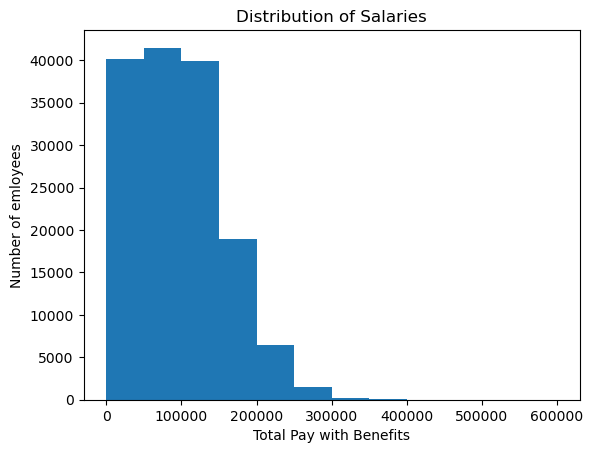

In [8]:
import matplotlib.pyplot as plt
bins =[0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000]
plt.hist(df.TotalPayBenefits, bins=bins)
plt.xlabel('Total Pay with Benefits',)
plt.ylabel('Number of emloyees')
plt.title('Distribution of Salaries')

plt.show()

there is only:  ['San Francisco']


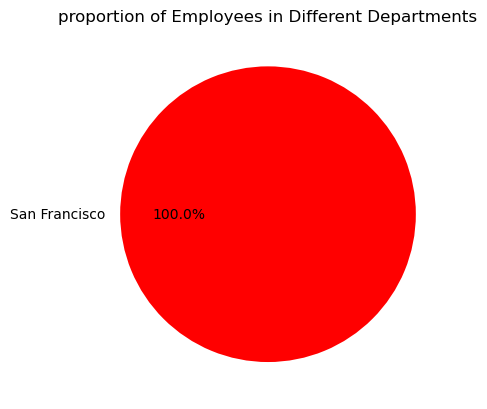

In [9]:
unique_agencies = df['Agency'].unique()
print("there is only: ",unique_agencies)
# here there is only 1 agency if that is what you wanted by departments 
department= df['Agency'].value_counts()
plt.pie(department,labels=["San Francisco"],colors="r",autopct='%1.1f%%')
plt.title('proportion of Employees in Different Departments')
plt.show()


# 5-Grouped Analysis:
    Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [10]:
year=df.groupby('Year')['TotalPayBenefits']
year.describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2011,36159.0,71744.103871,47498.706594,0.00,36810.7600,68213.240,102512.6800,567595.43
2012,36766.0,100553.229232,63555.796681,1.91,51743.0925,101751.290,142396.3325,407274.78
2013,37606.0,101440.519714,66390.034642,-33.89,48259.6000,101969.445,142793.6875,425815.28
2014,38123.0,100250.918884,66238.852887,-618.13,44199.9900,101105.370,142746.9500,510732.68


In [11]:
print("we can see from the statistics above that the avrage payment increased from 2011 to 2013 and in year 2014 it had decreased.")

we can see from the statistics above that the avrage payment increased from 2011 to 2013 and in year 2014 it had decreased.


# 6-Simple Correlation Analysis:
dentify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

In [12]:
import seaborn as sns

Correlation between TotalPayBenefits and BasePay: 0.9429986849707098


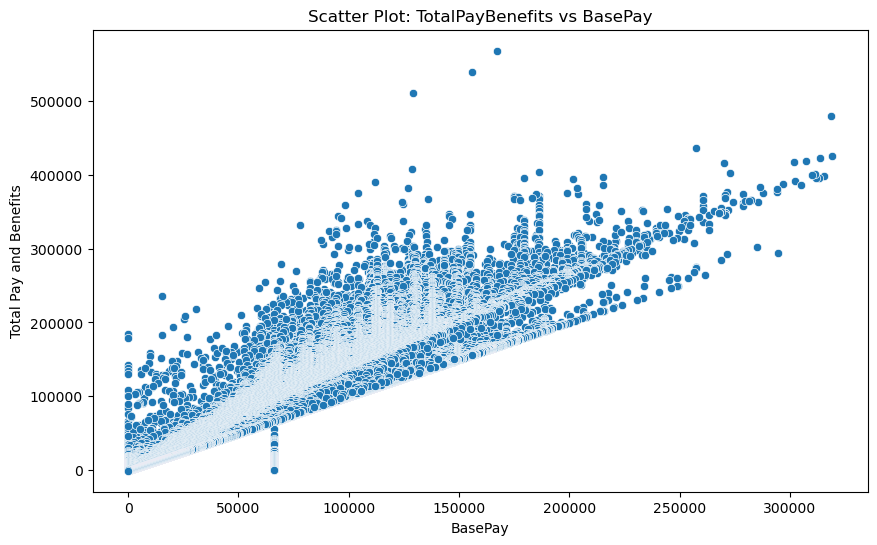

Correlation between TotalPayBenefits and Benefits: 0.7819630887982381


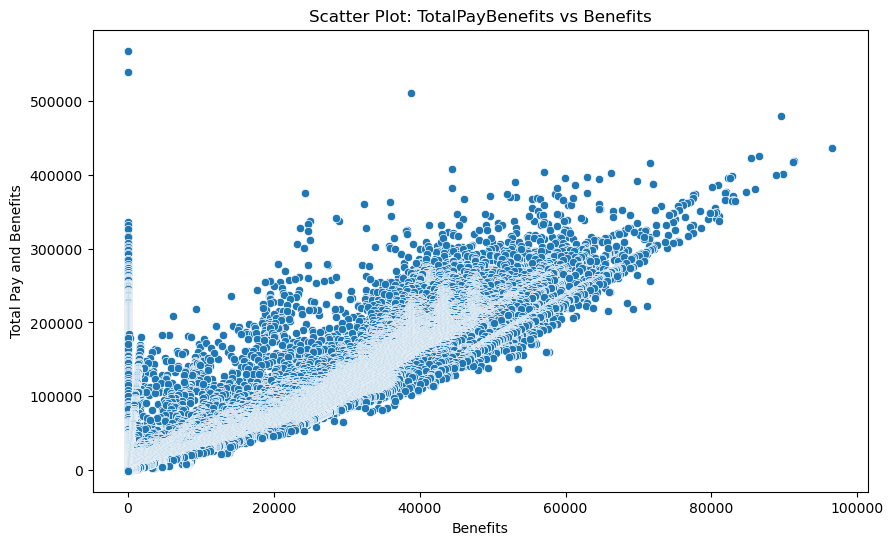

In [13]:
correlation_column1 = 'BasePay'
correlation_column2 = 'Benefits'

correlation_coefficient = df['TotalPayBenefits'].corr(df[correlation_column1])
correlation_coefficient2 = df['TotalPayBenefits'].corr(df[correlation_column2])

print(f"Correlation between TotalPayBenefits and {correlation_column1}: {correlation_coefficient}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[correlation_column1], y=df['TotalPayBenefits'])
plt.xlabel(correlation_column1)
plt.ylabel('Total Pay and Benefits')
plt.title(f'Scatter Plot: TotalPayBenefits vs {correlation_column1}')
plt.show()

print(f"Correlation between TotalPayBenefits and {correlation_column2}: {correlation_coefficient2}")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[correlation_column2], y=df['TotalPayBenefits'])
plt.xlabel(correlation_column2)
plt.ylabel('Total Pay and Benefits')
plt.title(f'Scatter Plot: TotalPayBenefits vs {correlation_column2}')
plt.show()


# 7-Summary of Insights:
Write a brief report summarizing the findings and insights from the analyses.

This CSV file contains information about a company, its employees, and their salaries from the year 2011 to 2014. The dataset comprises details for 148,654 distinct employees. Missing data was addressed by either replacing it with the mean or zero, depending on the context of the column.

The mean salary with benefits is $93,693, with a standard deviation of $62,794. Consequently, it is reasonable to anticipate that 95% of the salaries fall within the range of $ 93,693 ± $ 125,588, ranging from a minimum of -$618 to a maximum of $567,595.

A histogram chart was employed to visualize the distribution of salaries. Additionally, a pie chart was utilized to depict the proportion of employees across different departments, revealing that all employees belonged to the San Francisco agency.

The grouped analysis demonstrated variations in the mean salary across years, reaching its lowest point in 2011 and peaking in 2013, with a slight decline in 2014. Concurrently, the analysis revealed an increase in the number of employees each year.

Lastly, a simple correlation analysis unveiled a strong correlation (0.94) between base pay and total pay with benefits. Furthermore, a significant correlation (0.78) was observed between benefits and total pay with benefits, although it is lower compared to the correlation with base pay. 

